In [2]:
%autosave 0

import sys
import random

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [4]:
sys.path.append("../")
from simulation.cloud import *
from simulation.data import *
from simulation.plot import *
from simulation.log import *
# from simulation.utils import plot_ecdf, ecdf

In [7]:
NUM_LEAFS = 1056
NUM_HOSTS_PER_LEAF = 48
NUM_RULES_PER_LEAF = 1000
MAX_VMS_PER_HOST = 20
NUM_TENANTS = 3000
MIN_VMS_PER_TENANT = 10
MAX_VMS_PER_TENANT = 5000
VM_DIST = "expon"  # options: expon
NUM_GROUPS = 1000000
MIN_GROUP_SIZE = 5
GROUP_SIZE_DIST = "wve"  # options: uniform and wve
PLACEMENT_DIST = "colocate-random-linear"  # options: uniform, colocate-random-linear, 
# colocate-random-random, sorted-colocate-random-linear, and sorted-colocate-random-random
COLOCATE_NUM_HOSTS_PER_LEAF = 48
NUM_BITMAPS = 24
NUM_LEAFS_PER_BITMAP = 3
REDUNDANCY_PER_BITMAP = 2
MAX_BATCH_SIZE = 1
ALGORITHM = 'single_match'  # options: single_match, exact_match, fuzzy_match, greedy_match, random_fuzzy_match
MULTI_THREADED = True
NUM_JOBS = 4
SEED = 0

In [8]:
random.seed(SEED)

cloud = Cloud(num_leafs=NUM_LEAFS,
              num_hosts_per_leaf=NUM_HOSTS_PER_LEAF,
              num_rules_per_leaf=NUM_RULES_PER_LEAF,
              max_vms_per_host=MAX_VMS_PER_HOST,
              num_tenants=NUM_TENANTS,
              min_vms_per_tenant=MIN_VMS_PER_TENANT,
              max_vms_per_tenant=MAX_VMS_PER_TENANT,
              vm_dist=VM_DIST,
              num_groups=NUM_GROUPS,
              min_group_size=MIN_GROUP_SIZE,
              group_size_dist=GROUP_SIZE_DIST,
              placement_dist=PLACEMENT_DIST,
              colocate_num_hosts_per_leaf=COLOCATE_NUM_HOSTS_PER_LEAF,
              num_bitmaps=NUM_BITMAPS,
              num_leafs_per_bitmap=NUM_LEAFS_PER_BITMAP,
              redundancy_per_bitmap=REDUNDANCY_PER_BITMAP,
              max_batch_size=MAX_BATCH_SIZE,
              algorithm=ALGORITHM,
              multi_threaded=MULTI_THREADED,
              num_jobs=NUM_JOBS)

network:leaf->hosts: 100% |#####################################| Time: 0:00:00
network:host->leaf: 100% |######################################| Time: 0:00:00
tenants:vm count: 100% |########################################| Time: 0:00:00
tenants:group count: 100% |#####################################| Time: 0:00:00
tenants:group sizes: 100% |#####################################| Time: 0:00:00
tenants:groups->vms:  88% |################################     | ETA:  0:00:03
                                                                               
tenants:groups->vms: 100% |#####################################| Time: 0:00:26
tenants:groups->vms: 100% |#####################################| Time: 0:00:27
placement:vms->host: 100% |#####################################| Time: 0:00:00
placement:vms->leaf: 100% |#####################################| Time: 0:00:00
placement:groups->leafs:  35% |###########                      | ETA:  0:00:10
placement:groups->leafs: 100% |#########

In [ ]:
data = Data(cloud)

In [7]:
data.algorithm_elapse_time().describe()

count    9.851200e+04
mean     1.181109e-02
std      4.316009e-02
min      1.117587e-07
25%      1.266599e-07
50%      2.011657e-07
75%      3.008172e-06
max      1.676444e+00
dtype: float64

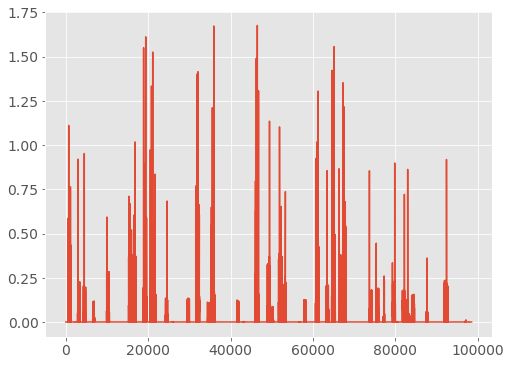

In [8]:
data.algorithm_elapse_time().plot(kind='line')

In [12]:
data.algorithm_elapse_time().to_csv('algorithm_elapse_time.csv')